In [75]:
import pandas as pd
import altair as alt

In [76]:
batting_df = pd.read_csv('../combined_data/batting_combined_fill_na.csv')
pitching_df = pd.read_csv('../combined_data/pitching_combined.csv')
standing_df = pd.read_csv('../combined_data/detailed_standings_combined.csv')

In [77]:
batting_df['missing_value_count'] = batting_df.isnull().sum(axis=1)
pitching_df['missing_value_count'] = pitching_df.isnull().sum(axis=1)
standing_df['missing_value_count'] = standing_df.isnull().sum(axis=1)


In [78]:
batting_numeric_columns = batting_df.select_dtypes(include='number').columns
batting_grouped_by_year_df = batting_df.groupby('Year', as_index=False)[batting_numeric_columns].mean()

pitching_numeric_columns = pitching_df.select_dtypes(include='number').columns
pitching_grouped_by_year_df = pitching_df.groupby('Year', as_index=False)[pitching_numeric_columns].mean()

standing_numeric_columns = standing_df.select_dtypes(include='number').columns
standing_grouped_by_year_df = standing_df.groupby('Year', as_index=False)[standing_numeric_columns].mean()


# Yosef- I used altair to create a plot visualizing missing values in the batting data  for each league.

In [79]:
batting_grouped_by_league_year_df = batting_df.groupby(['League', 'Year'])['missing_value_count'].mean().reset_index()

selection = alt.selection_multi(fields=['League'], bind='legend')

chart = alt.Chart(batting_grouped_by_league_year_df).mark_line(point=True).encode(
    x='Year:O',
    y='missing_value_count:Q',
    color='League:N',
    tooltip=['League', 'Year', 'missing_value_count'],
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).properties(
    title='Average BATTING Missing Values Over Time by League - Altair',
    width=800,
    height=400
).add_selection(
    selection
).interactive()

chart

/var/folders/5d/sgpfd8w16lb857wgmxnmbwk80000gn/T/ipykernel_45167/1530030588.py:3: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use selection_point instead.
  selection = alt.selection_multi(fields=['League'], bind='legend')
/var/folders/5d/sgpfd8w16lb857wgmxnmbwk80000gn/T/ipykernel_45167/1530030588.py:15: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.Chart(...)

### Ethan - Below is the same visualization for Pitching and DETAILED standings

In [80]:
pitching_grouped_by_league_year_df = pitching_df.groupby(['League', 'Year'])['missing_value_count'].mean().reset_index()

selection = alt.selection_multi(fields=['League'], bind='legend')

chart = alt.Chart(pitching_grouped_by_league_year_df).mark_line(point=True).encode(
    x='Year:O',
    y='missing_value_count:Q',
    color='League:N',
    tooltip=['League', 'Year', 'missing_value_count'],
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).properties(
    title='Average PITCHING Missing Values Over Time by League - Altair',
    width=800,
    height=400
).add_selection(
    selection
).interactive()

chart

/var/folders/5d/sgpfd8w16lb857wgmxnmbwk80000gn/T/ipykernel_45167/1538619446.py:3: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use selection_point instead.
  selection = alt.selection_multi(fields=['League'], bind='legend')
/var/folders/5d/sgpfd8w16lb857wgmxnmbwk80000gn/T/ipykernel_45167/1538619446.py:15: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.Chart(...)

In [81]:
standing_grouped_by_league_year_df = standing_df.groupby(['League', 'Year'])['missing_value_count'].mean().reset_index()

selection = alt.selection_multi(fields=['League'], bind='legend')

chart = alt.Chart(standing_grouped_by_league_year_df).mark_line(point=True).encode(
    x='Year:O',
    y='missing_value_count:Q',
    color='League:N',
    tooltip=['League', 'Year', 'missing_value_count'],
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).properties(
    title='Average Standing Missing Values Over Time by League - Altair',
    width=800,
    height=400
).add_selection(
    selection
).interactive()

chart

/var/folders/5d/sgpfd8w16lb857wgmxnmbwk80000gn/T/ipykernel_45167/2952557314.py:3: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use selection_point instead.
  selection = alt.selection_multi(fields=['League'], bind='legend')
/var/folders/5d/sgpfd8w16lb857wgmxnmbwk80000gn/T/ipykernel_45167/2952557314.py:15: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.Chart(...)

In [82]:
# # Plot the average batting age over time
# plt.figure(figsize=(10, 6))
# plt.plot(grouped_by_year_df['Year'], grouped_by_year_df['BatAge'], m  arker='o')
# plt.title('Average Batting Age Over Time')
# plt.xlabel('Year')
# plt.ylabel('Average Batting Age')
# plt.grid(True)
# plt.show()

# # Plot the average runs per game over time
# plt.figure(figsize=(10, 6))
# plt.plot(grouped_by_year_df['Year'], grouped_by_year_df['R/G'], marker='o')
# plt.title('Average Runs Per Game Over Time')
# plt.xlabel('Year')
# plt.ylabel('Average Runs Per Game')
# plt.grid(True)
# plt.show()

# # Plot the average number of home runs over time
# plt.figure(figsize=(10, 6))
# plt.plot(grouped_by_year_df['Year'], grouped_by_year_df['HR'], marker='o')
# plt.title('Average Number of Home Runs Over Time')
# plt.xlabel('Year')
# plt.ylabel('Average Number of Home Runs')
# plt.grid(True)
# plt.show()

In [83]:
# import altair as alt

# # Create an Altair chart for the average batting age over time
# bat_age_chart = alt.Chart(grouped_by_year_df).mark_line(point=True).encode(
#     x='Year:O',
#     y='BatAge:Q',
#     tooltip=['Year', 'BatAge']
# ).properties(
#     title='Average Batting Age Over Time - Altair',
#     width=800,
#     height=400
# ).interactive()

# # Create an Altair chart for the average runs per game over time
# runs_per_game_chart = alt.Chart(grouped_by_year_df).mark_line(point=True).encode(
#     x='Year:O',
#     y='R/G:Q',
#     tooltip=['Year', 'R/G']
# ).properties(
#     title='Average Runs Per Game Over Time - Altair',
#     width=800,
#     height=400
# ).interactive()

# # Create an Altair chart for the average number of home runs over time
# home_runs_chart = alt.Chart(grouped_by_year_df).mark_line(point=True).encode(
#     x='Year:O',
#     y='HR:Q',
#     tooltip=['Year', 'HR']
# ).properties(
#     title='Average Number of Home Runs Over Time - Altair',
#     width=800,
#     height=400
# ).interactive()

# # Display the charts
# bat_age_chart & runs_per_game_chart & home_runs_chart

- ## Players League Quanity of Publications Over Time
    - 2 visualizations; one through matplotlib and one through altair

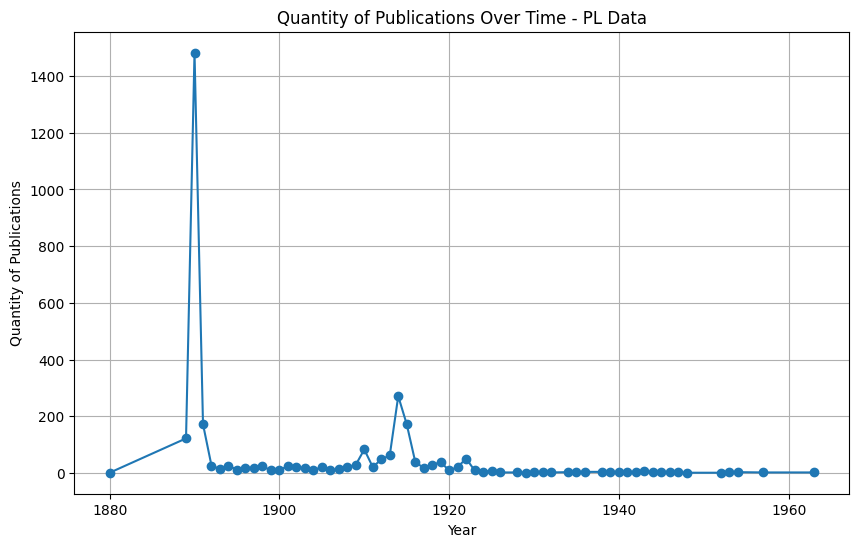

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
pl_data_df = pd.read_csv('../chroniclingamerica_csv/pl_data.csv')

# Ensure the 'Date' column is in datetime format
pl_data_df['Date'] = pd.to_datetime(pl_data_df['date'])

# Group by year and count the number of publications
pl_data_df['Year'] = pl_data_df['Date'].dt.year
publications_per_year = pl_data_df.groupby('Year').size().reset_index(name='Quantity')

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(publications_per_year['Year'], publications_per_year['Quantity'], marker='o')
plt.title('Quantity of Publications Over Time - PL Data')
plt.xlabel('Year')
plt.ylabel('Quantity of Publications')
plt.grid(True)
plt.show()

In [85]:
import pandas as pd
import altair as alt

# Load the data
pl_data_df = pd.read_csv('../chroniclingamerica_csv/pl_data.csv')

# Ensure the 'Date' column is in datetime format
pl_data_df['Date'] = pd.to_datetime(pl_data_df['date'])

# Group by year and count the number of publications
pl_data_df['Year'] = pl_data_df['Date'].dt.year
publications_per_year = pl_data_df.groupby('Year').size().reset_index(name='Quantity')

# Create the Altair chart
chart = alt.Chart(publications_per_year).mark_line(point=True).encode(
    x='Year:O',
    y='Quantity:Q',
    tooltip=['Year', 'Quantity']
).properties(
    title='Quantity of Publications Over Time - Altair PL Data',
    width=800,
    height=400
).interactive()

chart

alt.Chart(...)

In [86]:
# Enable the use of larger datasets in Altair
alt.data_transformers.disable_max_rows()

# Define the file paths and their corresponding labels
file_paths = {
    '../chroniclingamerica_csv/pl_data.csv': 'PL',
    '../chroniclingamerica_csv/nnl_data.csv': 'NNL',
    '../chroniclingamerica_csv/fl_data.csv': 'FL',
    '../chroniclingamerica_csv/ecl_data.csv': 'ECL',
    '../chroniclingamerica_csv/aa_data.csv': 'AA'
}

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Load and concatenate data from all CSV files
for file_path, label in file_paths.items():
    df = pd.read_csv(file_path, skiprows=1, names=['Newspaper', 'League', 'Date', 'URL'])
    if label == 'AA':
        df = df[(df['Date'] >= '1881-01-01') & (df['Date'] <= '1900-12-31')]  # Filter by active years in aa_data.csv
    df['Source'] = label  # Add a column to identify the source file
    all_data = pd.concat([all_data, df], ignore_index=True)

# Ensure the 'Date' column is in datetime format
all_data['Date'] = pd.to_datetime(all_data['Date'], errors='coerce')

# Drop rows with invalid dates
all_data = all_data.dropna(subset=['Date'])

# Group by year, newspaper, league, and source, and count the number of publications
all_data['Year'] = all_data['Date'].dt.year
publications_per_year = all_data.groupby(['Year', 'Newspaper', 'League', 'Source']).size().reset_index(name='Quantity')

In [87]:
import altair as alt

# Create a selection object
selection = alt.selection_multi(fields=['League'], bind='legend')

# Create the Altair dot plot with colors representing different leagues
chart = alt.Chart(publications_per_year).mark_circle(size=60).encode(
    x='Year:O',
    y=alt.Y('Quantity:Q', scale=alt.Scale(domain=[0, 800])),  # Set the y-axis scale domain
    color=alt.Color('League:N', scale=alt.Scale(scheme='category10'), legend=alt.Legend(title="League", orient="top-right")),  # Use a categorical color scheme and place the legend at the top right
    tooltip=['Year', 'Quantity', 'Newspaper', 'League', 'Source'],
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))  # Adjust opacity based on selection
).properties(
    title='Quantity of Publications Over Time - Altair Data',
    width=800,
    height=400
).add_selection(
    selection
).interactive()

chart

/var/folders/5d/sgpfd8w16lb857wgmxnmbwk80000gn/T/ipykernel_45167/2582008895.py:4: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use selection_point instead.
  selection = alt.selection_multi(fields=['League'], bind='legend')
/var/folders/5d/sgpfd8w16lb857wgmxnmbwk80000gn/T/ipykernel_45167/2582008895.py:17: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.Chart(...)

### The above plot is interactive. Try clicking on individual leagues in the legend.

### Ethan -Next, we have some code that generates word clouds. The top code generates a word cloud for a random article. The next code block collects a sample of 10 (increase this number for a greater representation) articles from each league.

#### We use the computational method Named Entity Recognition using REGEX (There were issues with dependencies and python version when trying to use nlp libraries.)

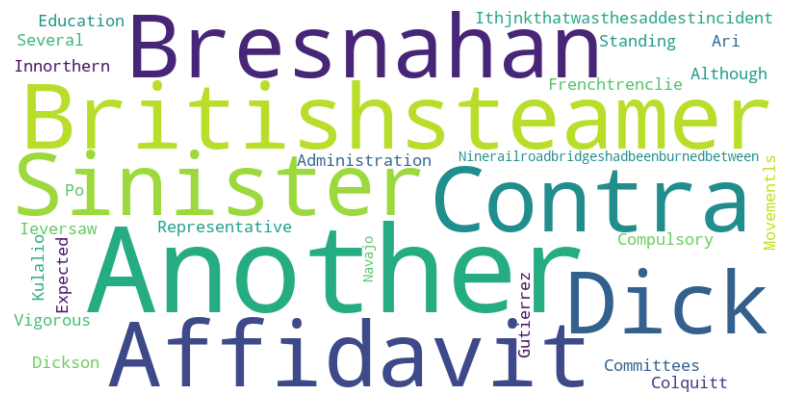

federal league - El Paso herald. (1915-01-18)


In [88]:
import requests
import random
from io import BytesIO
from PyPDF2 import PdfReader
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud_from_pdf(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to fetch PDF from {url}")
    pdf_data = BytesIO(response.content)

    reader = PdfReader(pdf_data)
    text = ""
    for page in reader.pages:
        page_text = page.extract_text()
        if page_text:
            names = extract_names_from_text(page_text)
            text += " ".join(names) + " "
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

sample_row = all_data.sample(n=1).iloc[0]
pdf_url = sample_row['URL']
title = f"{sample_row['League']} - {sample_row['Newspaper']} ({sample_row['Date'].strftime('%Y-%m-%d')})"
create_wordcloud_from_pdf(pdf_url)
print(title)


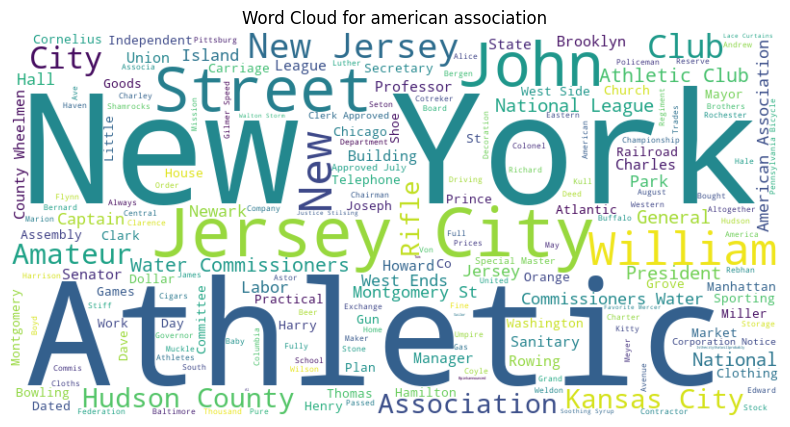

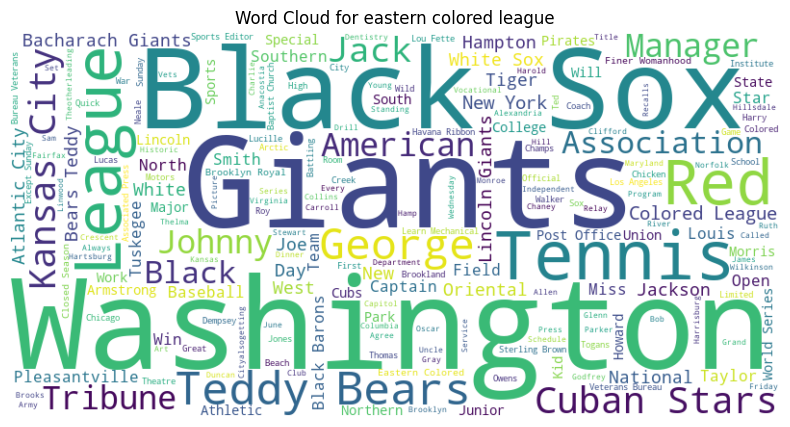

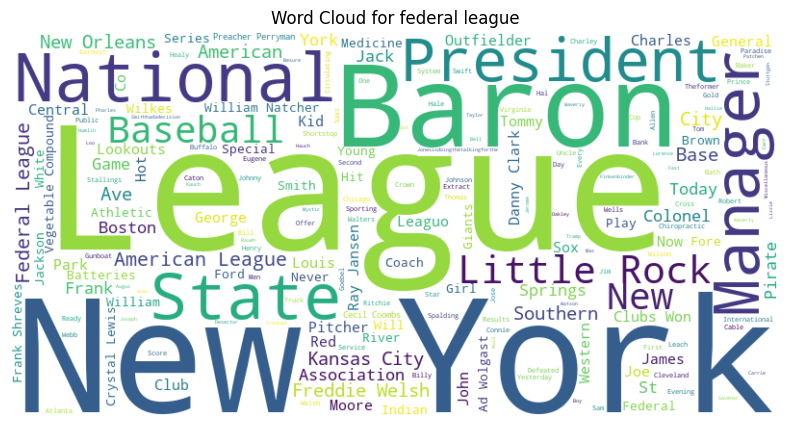

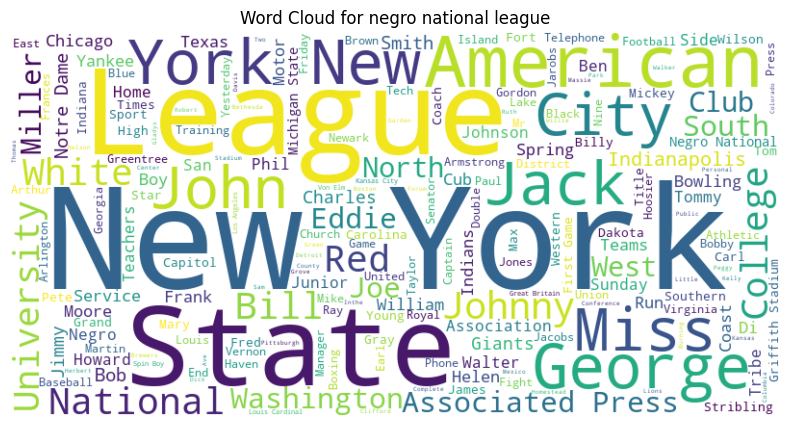

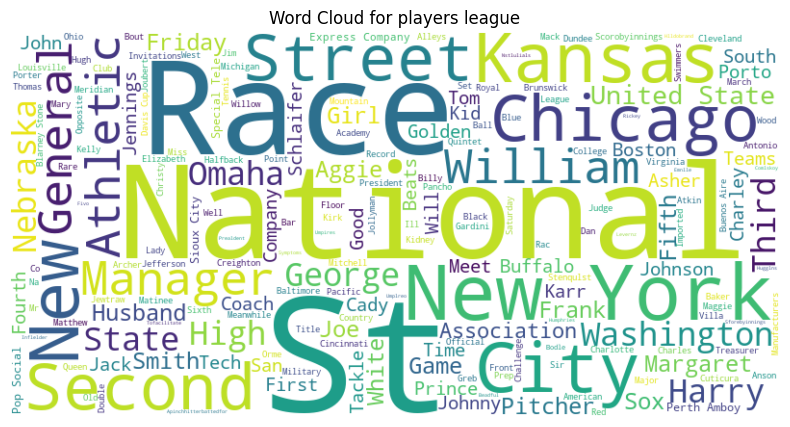

In [89]:
import random
from collections import defaultdict
import requests
from io import BytesIO
from PyPDF2 import PdfReader
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

def create_wordcloud_from_text(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

def extract_names_from_text(text):
    # A basic regex pattern for names (first and last, capitalized)
    name_pattern = r'\b[A-Z][a-z]+\s[A-Z][a-z]+\b'
    return re.findall(name_pattern, text)

# Group the data by league and collect a random sample of 10 articles for each league
grouped_data = all_data.groupby('League')
sampled_data = defaultdict(list)

for league, group in grouped_data:
    sampled_data[league] = group.sample(n=min(10, len(group)), random_state=42)

# Generate word clouds for each league
for league, sample in sampled_data.items():
    text = ""
    for url in sample['URL']:
        response = requests.get(url)
        if response.status_code == 200:
            pdf_data = BytesIO(response.content)
            reader = PdfReader(pdf_data)
            for page in reader.pages:
                page_text = page.extract_text()
                if page_text:
                    # Use regex to extract names from the page text
                    names = extract_names_from_text(page_text)
                    text += " ".join(names) + " "
    
    create_wordcloud_from_text(text, f"Word Cloud for {league}")


Ethan - Next, we inspected the individual newspapers that published articles on each newspaper the most. This highlights  disparities between the leagues.

In [90]:

grouped_data = all_data.groupby(['League', 'Newspaper']).size().reset_index(name='Quantity')

top_newspapers = grouped_data.groupby('League').apply(lambda x: x.nlargest(10, 'Quantity')).reset_index(drop=True)

bubble_chart = alt.Chart(top_newspapers).mark_circle().encode(
    x=alt.X('Newspaper:N', sort='-y', title='Newspaper'),
    y=alt.Y('Quantity:Q', title='Number of Publications'),
    size=alt.Size('Quantity:Q', title='Number of Publications'),
    color='League:N',
    tooltip=['League', 'Newspaper', 'Quantity']
).properties(
    title='Top 3 Newspapers by Number of Publications for Each League',
    width=800,
    height=400
).configure_axis(
    labelAngle=-45
).configure_title(
    fontSize=16
)

bubble_chart

/var/folders/5d/sgpfd8w16lb857wgmxnmbwk80000gn/T/ipykernel_45167/1345844755.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_newspapers = grouped_data.groupby('League').apply(lambda x: x.nlargest(10, 'Quantity')).reset_index(drop=True)


alt.Chart(...)